In [4]:
import pandas as pd
from libsvm.svmutil import *
import numpy as np

#read and parse the preprocessed apple quality .csv features file 
df = pd.read_csv('Data/Apple Quality/apple_quality_preprocessed.csv')
df.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
 7   Quality      4000 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 250.1 KB


In [7]:
columns = df.shape[1]

# construct an array for all features input values
inputcolumns = df.columns[0 : 7]
features = df[inputcolumns].values

# construct an array for all features target values
outputcolumn = df.columns[7]
targets = df[outputcolumn].values

print(features.shape)
print(targets.shape)

(4000, 7)
(4000,)


In [8]:
#select the first 80% patterns for training
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size = 0.20, random_state= 42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3200, 7)
(800, 7)
(3200,)
(800,)


In [9]:
# train the model using the training set 
model = svm_train(y_train, x_train, '-t 0 -c 100')

In [10]:
# Predict labels using test set
predicted_labels, accuracy, decision_values = svm_predict(y_test, x_test, model)

Accuracy = 76% (608/800) (classification)


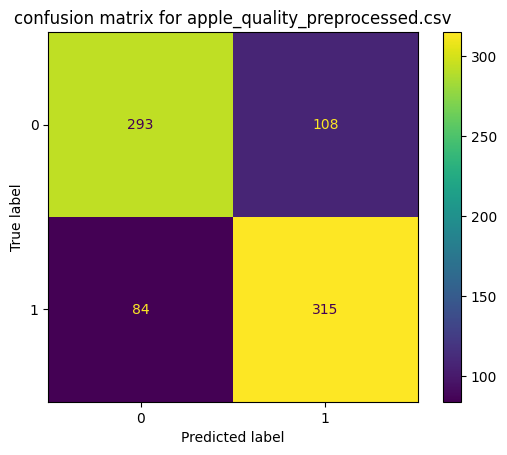

In [11]:
import matplotlib.pyplot as plt
from sklearn import metrics

actual = y_test
predicted = predicted_labels

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.title("confusion matrix for apple_quality_preprocessed.csv")
plt.show()